# Feature Engineering with Text Data

### Deleting non-ASCII characters

In [1]:
def clean_input(text):
    """
    :param text: User input text
    :return: Sanitized text, without non ascii characters
    """
    return str(text.encode().decode('ascii', errors='ignore'))

clean_input("Lösung")

'Lsung'

### Tokenizing text

In [2]:
import nltk
nltk.download('punkt')

text = "Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing. That's true."
sentences = nltk.sent_tokenize(text)
tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\derfu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Mr.',
  "O'Neill",
  'thinks',
  'that',
  'the',
  'boys',
  "'",
  'stories',
  'about',
  'Chile',
  "'s",
  'capital',
  'are',
  "n't",
  'amusing',
  '.'],
 ['That', "'s", 'true', '.']]

### Word stats

In [12]:
import pandas as pd
import spacy

from tqdm import tqdm

SPACY_MODEL = spacy.load("en_core_web_sm")
tqdm.pandas()


POS_NAMES = {
    "ADJ": "adjective",
    "ADP": "adposition",
    "ADV": "adverb",
    "AUX": "auxiliary verb",
    "CONJ": "coordinating conjunction",
    "DET": "determiner",
    "INTJ": "interjection",
    "NOUN": "noun",
    "NUM": "numeral",
    "PART": "particle",
    "PRON": "pronoun",
    "PROPN": "proper noun",
    "PUNCT": "punctuation",
    "SCONJ": "subordinating conjunction",
    "SYM": "symbol",
    "VERB": "verb",
    "X": "other",
}


def count_each_pos(df):
    """
    Count occurrences of each part of speech, and add it do an input DataFrame
    :param df: input DataFrame containing text that has been passed to SPACY_MODEL
    :return: DataFrame with occurrence counts
    """
    global POS_NAMES
    pos_list = df["spacy_text"].apply(lambda doc: [token.pos_ for token in doc])
    for pos_name in POS_NAMES.keys():
        df[pos_name] = (
            pos_list.apply(
                lambda x: len([match for match in x if match == pos_name])
            )
            / df["num_chars"]
        )
    return df


def get_avg_wd_len(tokens):
    """
    Returns average word length for a list of words
    :param tokens: array of words
    :return: average number of characters per word
    """
    if len(tokens) < 1:
        return 0
    lens = [len(x) for x in tokens]
    return float(sum(lens) / len(lens))


def get_word_stats(df):
    """
    Adds statistical features such as word counts to a DataFrame
    :param df: DataFrame containing a full_text column with training questions
    :return: DataFrame with new feature columns
    """
    global SPACY_MODEL
    
    df["num_chars"] = df["full_text"].str.len()

    df["num_questions"] = 100 * df["full_text"].str.count("\?") / df["num_chars"]
    df["num_periods"] = 100 * df["full_text"].str.count("\.") / df["num_chars"]
    df["num_commas"] = 100 * df["full_text"].str.count(",") / df["num_chars"]
    df["num_exclam"] = 100 * df["full_text"].str.count("!") / df["num_chars"]
    df["num_quotes"] = 100 * df["full_text"].str.count('"') / df["num_chars"]
    df["num_colon"] = 100 * df["full_text"].str.count(":") / df["num_chars"]
    df["num_semicolon"] = 100 * df["full_text"].str.count(";") / df["num_chars"]
    
    df["spacy_text"] = df["full_text"].progress_apply(lambda x: SPACY_MODEL(x))

    df["num_words"] = (
        df["spacy_text"].apply(lambda x: 100 * len(x)) / df["num_chars"]
    )
    df["num_diff_words"] = df["spacy_text"].apply(lambda x: len(set(x)))
    df["avg_word_len"] = df["spacy_text"].apply(lambda x: get_avg_wd_len(x))
    df["num_stops"] = (
        df["spacy_text"].apply(
            lambda x: 100 * len([stop for stop in x if stop.is_stop])
        )
        / df["num_chars"]
    )

    df = count_each_pos(df.copy())
    return df

df = pd.DataFrame({"full_text": [
    "Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing.", "That's true."
]})
get_word_stats(df).transpose()

100%|██████████| 2/2 [00:00<00:00, 52.92it/s]


,0,1
full_text,Mr. O'Neill thinks that the boys' stories abou...,That's true.
num_chars,79,12
num_questions,0,0
num_periods,2.53165,8.33333
num_commas,0,0
num_exclam,0,0
num_quotes,0,0
num_colon,0,0
num_semicolon,0,0
spacy_text,"(Mr., O'Neill, thinks, that, the, boys, ', sto...","(That, 's, true, .)"


### Vectorizing Text - Normalized Bag-of-Words

In [25]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.DataFrame({
    "full_text": [
        "Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing.", 
        "That's true.",
        "Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua.",
        "That", "is", "tree", "human", "religion", "bottle", "pen", "mouse", "computer", "keyboard"
    ],
    "label": [
        True, False, True, True, False, True, False, False, False, True, True, False, True
    ]            
})
label_column = df["label"]

# Create an instance of a tfidf vectorizer, 
# We could use CountVectorizer for a non normalized version
vectorizer = TfidfVectorizer()#ngram_range=(1, 2), min_df=5, max_features=2**21)

# Fit our vectorizer to questions in our dataset
# Returns an array of vectorized text
bag_of_words = vectorizer.fit_transform(df["full_text"])
bag_of_words

<13x44 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in Compressed Sparse Row format>

C:\Users\derfu\anaconda3\lib\site-packages\umap\umap_.py:1679: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Text(0, 0.5, 'y')

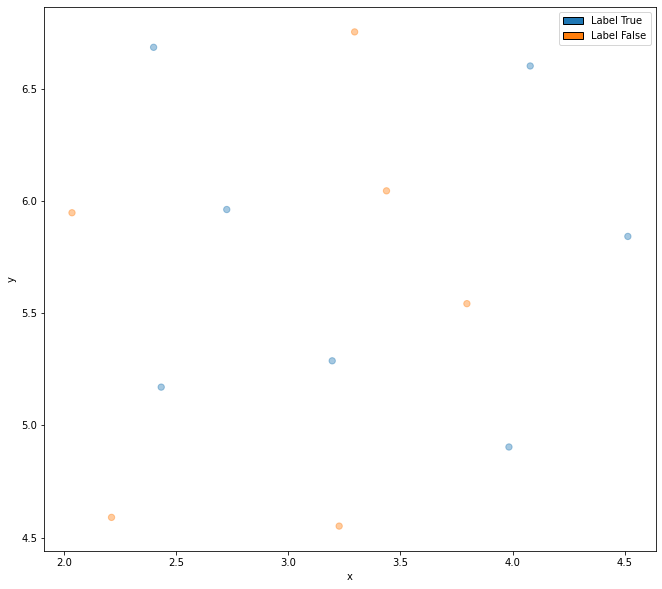

In [28]:
import umap
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

umap_embedder = umap.UMAP()
embeddings = umap_embedder.fit_transform(bag_of_words)


fig = plt.figure(figsize=(16, 10))
color_map = {True: "#1f77b4", False: "#ff7f0e"}
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    c=[color_map[x] for x in label_column],
    s=40,
    alpha=0.4,
)

handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["#1f77b4", "#ff7f0e"]
]
labels = ["Label True", "Label False"]
plt.legend(handles, labels)

plt.gca().set_aspect("equal", "box")
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("y")

### Vectorization - SpaCy

In [38]:
import spacy

nlp = spacy.load('en_core_web_sm')

df = pd.DataFrame({
    "full_text": [
        "Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing.", 
        "That's true.",
        "Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua.",
        "That", "is", "tree", "human", "religion", "bottle", "pen", "mouse", "computer", "keyboard"
    ],
    "label": [
        True, False, True, True, False, True, False, False, False, True, True, False, True
    ]            
})
label_column = df["label"]

spacy_emb = df["full_text"].apply(lambda x: nlp(x).vector)
bag_of_words = np.vstack(spacy_emb)
bag_of_words

array([[ 0.15016587,  0.21968287, -0.14092764, ...,  0.68508136,
         0.49944445, -0.7296176 ],
       [-1.0281608 , -1.0779704 ,  0.35232335, ...,  0.2590407 ,
        -0.5899911 , -0.5024116 ],
       [ 1.5346218 ,  1.168573  ,  0.00756645, ...,  1.382202  ,
         0.21090181, -0.5583734 ],
       ...,
       [-0.11525279,  2.127602  ,  3.0914063 , ...,  0.22973686,
         1.9186981 , -2.847746  ],
       [ 0.42800403,  0.50988233,  1.288194  , ..., -0.6656015 ,
        -0.47617063, -2.41182   ],
       [-0.02925038, -1.0066718 ,  1.1522459 , ..., -0.59848785,
        -1.6679065 , -0.262261  ]], dtype=float32)

C:\Users\derfu\anaconda3\lib\site-packages\umap\umap_.py:1679: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Text(0, 0.5, 'y')

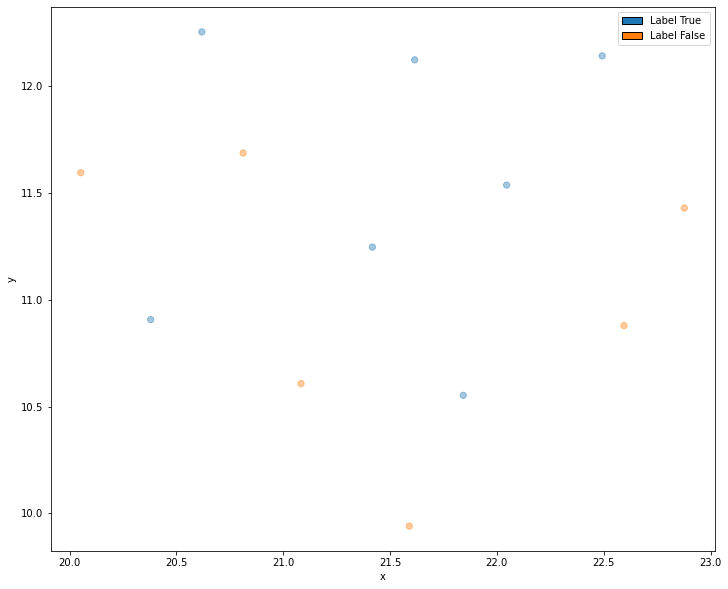

In [39]:
import umap
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

umap_embedder = umap.UMAP()
embeddings = umap_embedder.fit_transform(bag_of_words)


fig = plt.figure(figsize=(16, 10))
color_map = {True: "#1f77b4", False: "#ff7f0e"}
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    c=[color_map[x] for x in label_column],
    s=40,
    alpha=0.4,
)

handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["#1f77b4", "#ff7f0e"]
]
labels = ["Label True", "Label False"]
plt.legend(handles, labels)

plt.gca().set_aspect("equal", "box")
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("y")